# Project Reacher 

In this short Notebook, I will show how my implementation of Deep Deterministic Policy Gradient (DDPG) manages to solve Unity's Reacher environment. This project was carried out as part as Udacity's DRL nanodegree and some of the code are inspired from examples of the course.  


In [1]:
%matplotlib inline

# Import
from unityagents import UnityEnvironment
import numpy as np

We will start by launching the environment. 

1) Download the environment 
Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux.zip)
Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher.app.zip)
Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86.zip)
Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip)

2) Indicate the location of the following file : 
Mac: "path/to/Reacher.app"

Windows (x86): "path/to/Reacher_Windows_x86/Reacher.exe"

Windows (x86_64): "path/to/Reacher_Windows_x86_64/Reacher.exe"

Linux (x86): "path/to/Reacher_Linux/Reacher.x86"

Linux (x86_64): "path/to/Reacher_Linux/Reacher.x86_64"

Linux (x86, headless): "path/to/Reacher_Linux_NoVis/Reacher.x86"

Linux (x86_64, headless): "path/to/Reacher_Linux_NoVis/Reacher.x86_64"


env = UnityEnvironment(file_name="Reacher.app")

In [2]:
#Indicate the environment location in the location variable
location = '../Project/Reacher_Linux/Reacher.x86_64'
#no_graphics=True disables the graphics and speeds up the training
env = UnityEnvironment(file_name=location,no_graphics=False)

# Start the Brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Finally, let's have a look at the environment

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## Training

* Note : skip this part if you don't want to train the agent, *
The agent and the descriptions of the neural networks are located in ddpg_agent.py and model.py respectively. Here, we just create one agent. 

In [4]:
# Define the Actor and Critic Policy
from ddpg_agent import Agent
#Create an agent
agent = Agent(state_size=33, action_size=4, random_seed=1)

We will start the training. We will output the average score over the last 5 episodes and the one over the 100 last ones. The environment is considered solved when the agent reaches an average score of 30 over the 100 last episodes. We will collect experience from 20 different agents, but only train one actor and one critic. Each agent will use the same weights for the training. 

/home/romain/.conda/envs/DRL/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 5	Average Score: 0.745 last episodes: 0.74	 Average over 100 last episodes :0.74
Episode 10	Average Score: 1.355 last episodes: 1.35	 Average over 100 last episodes :1.05
Episode 15	Average Score: 2.465 last episodes: 2.46	 Average over 100 last episodes :1.52
Episode 20	Average Score: 6.995 last episodes: 6.99	 Average over 100 last episodes :2.89
Episode 25	Average Score: 15.36 last episodes: 15.36	 Average over 100 last episodes :5.38
Episode 30	Average Score: 19.29 last episodes: 19.29	 Average over 100 last episodes :7.70
Episode 35	Average Score: 21.92 last episodes: 21.92	 Average over 100 last episodes :9.73
Episode 40	Average Score: 27.68 last episodes: 27.68	 Average over 100 last episodes :11.97
Episode 45	Average Score: 33.79 last episodes: 33.79	 Average over 100 last episodes :14.40
Episode 50	Average Score: 36.62 last episodes: 36.62	 Average over 100 last episodes :16.62
Episode 55	Average Score: 38.88 last episodes: 38.88	 Average over 100 last episodes :18.65


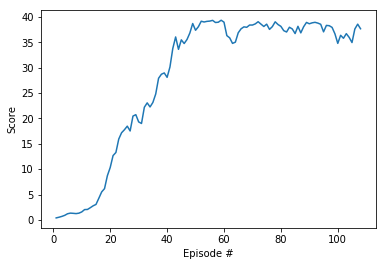

In [5]:
from collections import deque
import torch
import matplotlib.pyplot as plt

def ddpg(n_episodes=550, print_every=5):
    scores_last_episodes = deque(maxlen=print_every)
    scores_target = deque(maxlen=100)
    my_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()                                          #Reset the agent 
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = agent.act(states)              # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states,actions,rewards,next_states,dones) #Memorize and learn
            scores += env_info.rewards                        # update the score (for each agent)
            states = next_states                               # roll over states to next time step            
            if np.any(dones):
                break 
        score=np.mean(scores)   
        scores_last_episodes.append(score)
        scores_target.append(score)
        my_scores.append(score)
        print('\rEpisode {}\tAverage Score over 5 last episodes: {:.2f}\t Average over 100 last episodes :{:.2f}'.format(i_episode, np.mean(scores_last_episodes),np.mean(scores_target)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_last_episodes)))
        if(np.mean(scores_target)>30):
            print('Environment Solved !')
            break
        
    return my_scores

fig = plt.figure()

scores = ddpg()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



Let's watch our agent !

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations                  # get the current state (for each agent)
        #agent.reset()
scores = np.zeros(num_agents)         # initialize the score (for each agent)
while True:
    actions = agent.act(states,True)              # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    agent.step(states,actions,rewards,next_states,dones) #Memorize and learn
    scores += env_info.rewards                        # update the score (for each agent)
    states = next_states                               # roll over states to next time step            
    if np.any(dones):
        break 
print(np.mean(scores))   


/home/romain/.conda/envs/DRL/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Saving and loading the weights 

In [8]:
#Save the critic
torch.save(agent.critic_local.state_dict(), "critic.pth")
#Save the actor
torch.save(agent.actor_local.state_dict(),"actor.pth")


In [ ]:
# Load and watch
agent.critic_local.load_state_dict(torch.load("critic.pth"))
agent.actor_local.load_state_dict(torch.load("actor.pth"))

env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations                  # get the current state (for each agent)
        #agent.reset()
scores = np.zeros(num_agents)         # initialize the score (for each agent)
while True:
    actions = agent.act(states,True)              # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    agent.step(states,actions,rewards,next_states,dones) #Memorize and learn
    scores += env_info.rewards                        # update the score (for each agent)
    states = next_states                               # roll over states to next time step            
    if np.any(dones):
        break 
print(np.mean(scores))   